In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:

def rbf_kernel(x1, x2, theta):
    sigma = theta[0]
    l = theta[1]
    
    return sigma**2 * np.exp(-0.5 * np.subtract.outer(x1,x2)**2 / l**2)    

In [5]:
def conditionalDistribution(kernel, x_test, y_train, theta, p_train, mu_test, mu_train):
    A = kernel(x_test, x_test, theta)
    B = kernel(x_test, y_train, theta)
    C = kernel(y_train, y_train, theta)
    
    C_inv = np.linalg.inv(C)
    mat_BCinv = np.dot(B, C_inv)
    
    mu_ = mu_test + mat_BCinv.dot(y_train - mu_train)
    sigma_ = A - mat_BCinv.dot(C.T)
    

    return (mu_.squeeze(), sigma_.squeeze())

In [6]:
# parameters theta
theta = [1, 1/3.16]

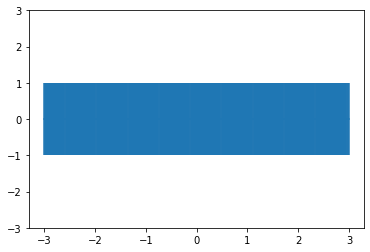

In [47]:
sigma_0 = rbf_kernel(0, 0, theta)
xpts = np.arange(-3, 3, step=0.01)

plt.errorbar(xpts, np.zeros(len(xpts)), yerr=sigma_0, capsize=0)
plt.ylim(-3, 3);

In [149]:
## function to compute the posterior mean and std deviation of each data point

def post_xele(x_element, y_train, kernel, theta, sigma_yy, p_ytrain, mu_train, mu_test_pt):
    
    sigma_xy_row = [kernel(x_element, y, theta) for y in y_train] # do not convert to an array
    
    yy_inv = np.linalg.inv(sigma_yy)
    
    mat_xy_yy1 = np.dot(sigma_xy_row, yy_inv)
    
    ## test element posterior mean
    
    x_post_ele_mu = mu_test_pt + mat_xy_yy1.dot(p_ytrain - mu_train)
    
    
    ## test posterior co-var matrix diagonal element
    
    sigma_xx = kernel(x_element, x_element, theta)
    
    xx_post_sigma_dia_ele = sigma_xx - mat_xy_yy1.dot(sigma_xy_row)
    
    return x_post_ele_mu, xx_post_sigma_dia_ele  # not as an immutable tuple


In [150]:
#np.random.seed(42)

x_0 = np.array(np.random.random(size=5) * 6 - 3) # choosing random points from -3 to +3

y_0 = np.array(np.random.normal(scale=sigma_0, size=5)) # assigning random values to sample points

sigma_1 = rbf_kernel(x_0, x_0, theta)

In [151]:
x_pred = np.linspace(-3, 3, 1000)

mu_train = np.zeros(y_0.shape)
mu_test = np.zeros(x_pred.shape)

sigma_yy = rbf_kernel(y_0, y_0, theta)
x_post = [post_xele(i, x_0, rbf_kernel, theta, sigma_1, y_0, mu_train, j) 
              for i,j in zip(x_pred, mu_test)]

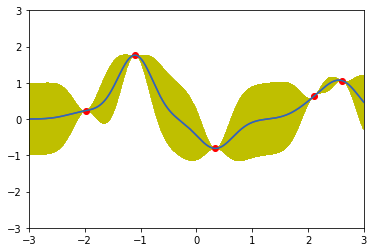

In [152]:
y_pred, sigmas = np.transpose(x_post)
plt.errorbar(x_pred, y_pred, ecolor='y', yerr=sigmas, capsize=0)
plt.plot(x_pred, y_pred, 'm')
plt.plot(x_0, y_0, "ro")
plt.xlim(-3, 3); plt.ylim(-3, 3);